In [1]:
# Importing packages
import numpy as np
import pandas as pd
import os
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test2 = pd.read_csv("test.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


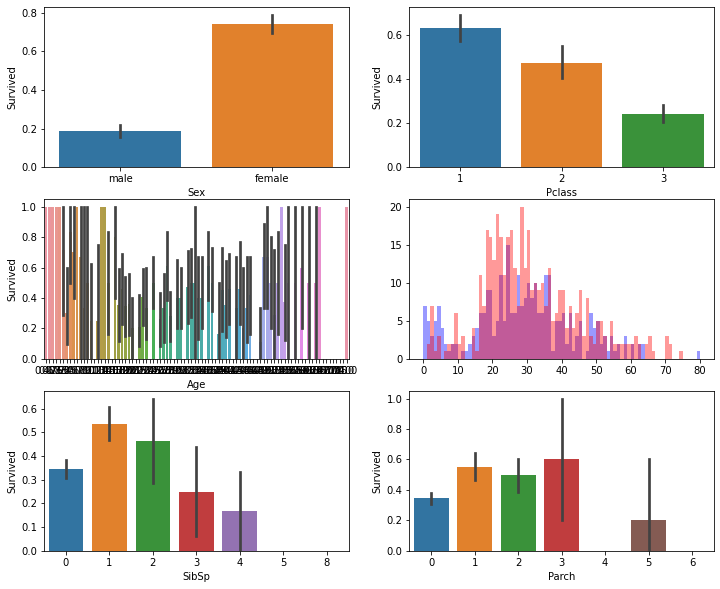

In [7]:
surv = train['Survived'] == 1
die = train['Survived'] == 0
plt.figure(figsize=[12,10])
plt.subplot(321)
sns.barplot('Sex','Survived',data = train)
plt.subplot(322)
sns.barplot('Pclass','Survived',data = train)
plt.subplot(323)
sns.barplot('Age','Survived',data = train)
plt.subplot(324)
sns.distplot(train[surv]['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(train[die]['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red')
plt.subplot(325)
sns.barplot('SibSp','Survived',data = train)
plt.subplot(326)
sns.barplot('Parch','Survived',data = train)

In [8]:
tab = pd.crosstab(train['SibSp'], train['Survived'])
print(tab)

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


In [9]:
sex = np.zeros(len(train))
sex[train['Sex']== 'male'] = 1
sex[train['Sex']== 'female'] = 0
train['Sex'] = sex

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
Embarked = np.zeros(len(train))
Embarked[train['Embarked']== 'C'] = 1
Embarked[train['Embarked']== 'Q'] = 2
Embarked[train['Embarked']== 'S'] = 3
train['Embarked'] = Embarked
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,3.0


In [11]:
print(type(train))
dropping = ['PassengerId','Name', 'Ticket','Cabin']
train.drop(dropping,axis=1, inplace=True)
test.drop(dropping,axis=1, inplace=True)
train.head()

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,3.0
1,1,1,0.0,38.0,1,0,71.2833,1.0
2,1,3,0.0,26.0,0,0,7.9250,3.0
3,1,1,0.0,35.0,1,0,53.1000,3.0
4,0,3,1.0,35.0,0,0,8.0500,3.0


In [12]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
age = np.zeros(len(train))
age[train['Age']<20] = 1
age[(train['Age']>=20)&(train['Age']<60)] = 2
age[(train['Age']>=60)] = 3
train['Age'] = age
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,2.0,1,0,7.2500,3.0
1,1,1,0.0,2.0,1,0,71.2833,1.0
2,1,3,0.0,2.0,0,0,7.9250,3.0
3,1,1,0.0,2.0,1,0,53.1000,3.0
4,0,3,1.0,2.0,0,0,8.0500,3.0


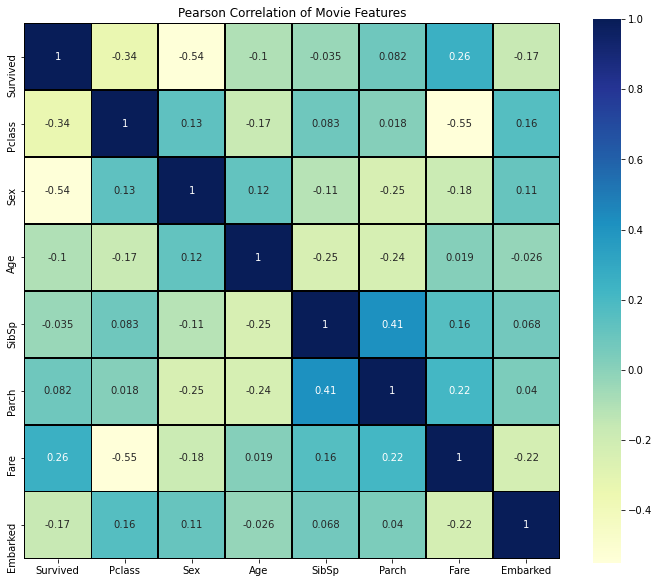

In [13]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(train.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [15]:
from sklearn.model_selection import cross_val_score, KFold

train_y=train['Survived']
train_ft=train.drop('Survived',axis=1)
kf = KFold(n_splits=10,random_state=None)
print(train_ft.head())
print(train_y.head())

   Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0       3  1.0  2.0      1      0   7.2500       3.0
1       1  0.0  2.0      1      0  71.2833       1.0
2       3  0.0  2.0      0      0   7.9250       3.0
3       1  0.0  2.0      1      0  53.1000       3.0
4       3  1.0  2.0      0      0   8.0500       3.0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [16]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(C = 30, gamma = 0.01)
svc.fit(train_ft, train_y) 

acc_SVM = cross_val_score(svc,train_ft,train_y,cv=kf)
print(acc_SVM.mean())

0.7732833957553059


In [18]:
from sklearn.neighbors import NearestCentroid
NN = NearestCentroid()
NN.fit(train_ft, train_y)
acc_NN = cross_val_score(NN,train_ft,train_y,cv=kf)
print(acc_NN.mean())

0.665692883895131


In [19]:
sex_test = np.zeros(len(test))
sex_test[test['Sex']== 'male'] = 1
sex_test[test['Sex']== 'female'] = 0
test['Sex'] = sex_test

In [20]:
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)
Embarked = np.zeros(len(test))
Embarked[test['Embarked']== 'C'] = 1
Embarked[test['Embarked']== 'Q'] = 2
Embarked[test['Embarked']== 'S'] = 3
test['Embarked'] = Embarked


In [21]:
age = np.zeros(len(test))
age[test['Age']<20] = 1
age[(test['Age']>=20)&(test['Age']<60)] = 2
age[(test['Age']>=60)] = 3
test['Age'] = age
test['Fare'].fillna(test['Fare'].mean(),inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,2.0,0,0,7.8292,2.0
1,3,0.0,2.0,1,0,7.0000,3.0
2,2,1.0,3.0,0,0,9.6875,2.0
3,3,1.0,2.0,0,0,8.6625,3.0
4,3,0.0,2.0,1,1,12.2875,3.0


In [22]:
np.sum(test.isnull())


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
predictions = svc.predict(test)
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [24]:
submission = pd.DataFrame({ 'PassengerId': test2['PassengerId'],
                            'Survived': predictions })
submission.to_csv("submission.csv", index=False)

In [25]:
dups = submission.pivot_table(index = ['Survived'], aggfunc ='size')
print(dups)

Survived
0    250
1    168
dtype: int64


In [26]:
#counting female survivors
submission = pd.DataFrame({ 'Sex': test2['Sex'],
                            'Survived': predictions })
dups = submission.pivot_table(index = ['Survived', 'Sex'], aggfunc ='size')
print(dups)

Survived  Sex   
0         female      9
          male      241
1         female    143
          male       25
dtype: int64


In [27]:
#counting survivors with no family members
submission = pd.DataFrame({ 'SibSp': test2['SibSp'],
                            'Parch': test2['Parch'],
                            'Survived': predictions })
dups = submission.pivot_table(index = ['Survived', 'SibSp', 'Parch'], aggfunc ='size')
print(dups)

Survived  SibSp  Parch
0         0      0        178
                 1          5
                 2          3
                 3          1
          1      0         26
                 1         14
                 2          3
                 3          1
                 4          1
                 5          1
                 6          1
          2      0          6
                 2          1
          3      0          1
                 1          2
          4      1          1
                 2          2
          5      2          1
          8      2          2
1         0      0         75
                 1          9
                 2         11
                 4          1
          1      0         34
                 1         19
                 2          7
                 3          1
                 9          2
          2      0          4
                 1          2
                 2          1
          3      2          1
          4      

In [28]:
#counting survivors according to pclass
submission = pd.DataFrame({ 'Pclass': test2['Pclass'],
                            'Survived': predictions })
dups = submission.pivot_table(index = ['Survived', 'Pclass'], aggfunc ='size')
print(dups)

Survived  Pclass
0         1          40
          2          63
          3         147
1         1          67
          2          30
          3          71
dtype: int64


In [30]:
percentage_death_class1 = (40/(40+67))*100
percentage_death_class2 = (63/(63+30))*100
percentage_death_class3 = (147/(147+71))*100
print(f'class 1: {percentage_death_class1}%')
print(f'class 2: {percentage_death_class2}%')
print(f'class 3: {percentage_death_class3}%')


class 1: 37.38317757009346%
class 2: 67.74193548387096%
class 3: 67.43119266055045%


In [31]:
#counting survivors according to pclass
submission = pd.DataFrame({ 'Embarked': test2['Embarked'],
                            'Survived': predictions })
dups = submission.pivot_table(index = ['Survived', 'Embarked'], aggfunc ='size')
print(dups)

Survived  Embarked
0         C            50
          Q            22
          S           178
1         C            52
          Q            24
          S            92
dtype: int64


In [32]:
percentage_death_C = (50/(50+52))*100
percentage_death_Q = (22/(22+24))*100
percentage_death_S = (178/(178+92))*100
print(f'C: {percentage_death_C}%')
print(f'Q: {percentage_death_Q}%')
print(f'S: {percentage_death_S}%')

C: 49.01960784313725%
Q: 47.82608695652174%
S: 65.92592592592592%
